In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def visual_comparison(df1: pd.DataFrame, df2: pd.DataFrame):

    for feature in df1.columns:

        plt.figure(figsize=(15, 2))
        plt.subplot(1, 2, 1)
        plt.hist(df1[feature], bins=30, alpha=0.5, color="blue", edgecolor="black")
        plt.xlabel(feature)
        plt.title(f"Dataset_1 {feature}")

        plt.subplot(1, 2, 2)
        plt.hist(df2[feature], bins=30, alpha=0.5, color="green", edgecolor="black")
        plt.xlabel(feature)
        plt.title(f"Dataset_2 {feature}")

    cor_mat_df1 = df1.corr()
    cor_mat_df2 = df2.corr()

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cor_mat_df1, annot=True, cmap="coolwarm")

    plt.subplot(1, 2, 2)
    sns.heatmap(cor_mat_df2, annot=True, cmap="coolwarm")

    plt.show()

    print(df1.describe())
    print(df2.describe())

In [ ]:
data = pd.read_csv("new_isc_04.csv")
data = data.drop(columns=['is_tv_subscriber', 'is_movie_package_subscriber',
       'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit' ])

print(data.shape)
print(data.columns)

(62274, 3)
Index(['id', 'subscription_age', 'churn'], dtype='object')


In [ ]:
# sprawdzenie pustych kolumn dla datasetu:
empty_cells = {column_name: data[column_name].isna().sum() for column_name in data.columns}
print(empty_cells)

{'id': 0, 'subscription_age': 0, 'churn': 0}


In [ ]:
# Uzupelnienie pustych wartości zerami
mydata = data.fillna(0)
empty_cells = {column_name: mydata[column_name].isna().sum() for column_name in mydata.columns}
print(empty_cells)

{'is_tv_subscriber': 0, 'is_movie_package_subscriber': 0, 'subscription_age': 0, 'remaining_contract': 0, 'service_failure_count': 0, 'download_avg': 0, 'upload_avg': 0, 'download_over_limit': 0, 'churn': 0}


In [ ]:
columns = mydata.columns

bin_features = ['is_tv_subscriber', 'is_movie_package_subscriber']
churn_features = 'churn'

non_bin_features = columns.difference(bin_features + [churn_features])
non_bin_data = mydata[non_bin_features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_bin_data)
churn_data = mydata[[churn_features]]
scaled_data = pd.DataFrame(scaled_data, columns=non_bin_features)
final_date = pd.concat([mydata[bin_features],scaled_data], axis=1)
final_data = pd.concat([final_date, churn_data.reset_index(drop=True)], axis=1)
final_data= final_data.apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
reorganize = ['is_tv_subscriber', 'is_movie_package_subscriber',
             'subscription_age', 'remaining_contract',
             'service_failure_count', 'download_avg', 'upload_avg',
             'download_over_limit', 'churn']

final_data = final_data[reorganize]
print(final_data.shape)
print(final_data.columns)

(62274, 9)
Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'remaining_contract', 'service_failure_count', 'download_avg',
       'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['churn']), data['churn'], test_size=0.2, random_state=42)

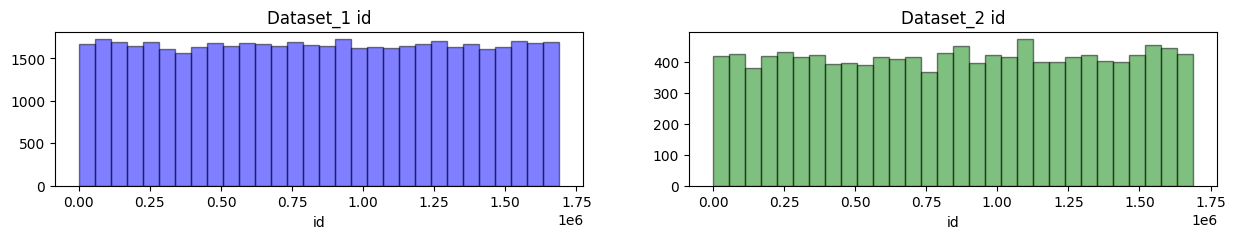

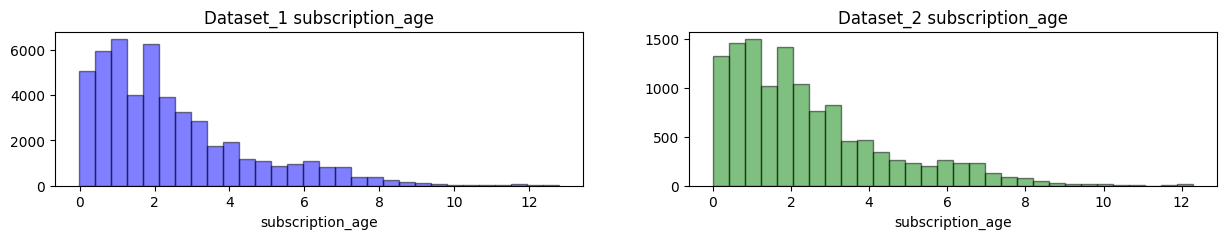

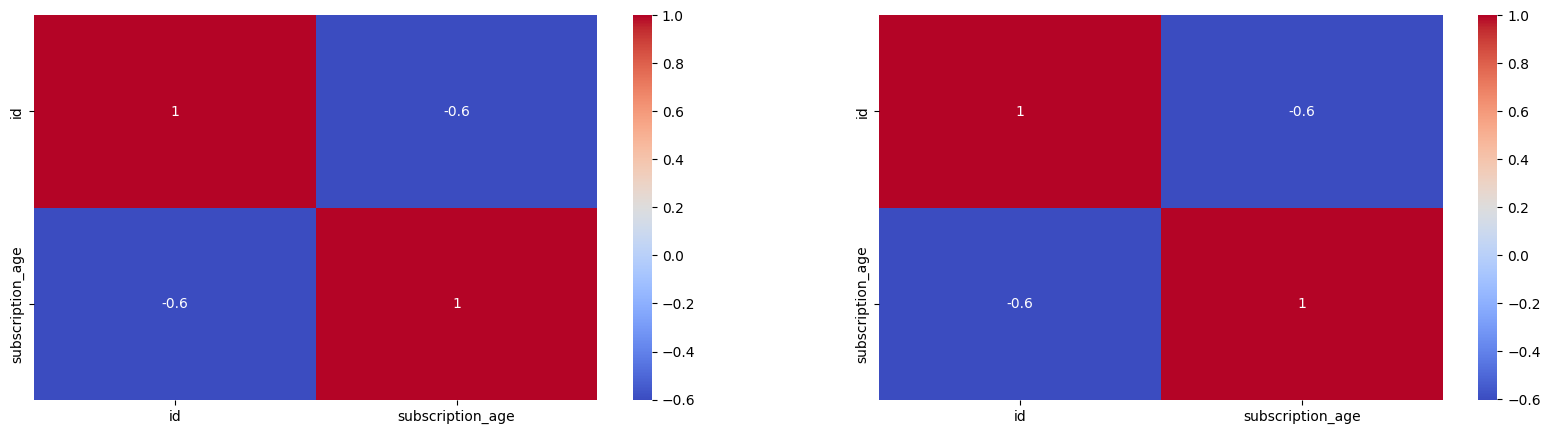

                 id  subscription_age
count  4.981900e+04      49819.000000
mean   8.450156e+05          2.456733
std    4.889667e+05          2.042096
min    1.500000e+01         -0.020000
25%    4.230130e+05          0.930000
50%    8.446030e+05          1.980000
75%    1.267598e+06          3.310000
max    1.689733e+06         12.800000
                 id  subscription_age
count  1.245500e+04      12455.000000
mean   8.511070e+05          2.432049
std    4.897032e+05          2.010239
min    3.400000e+01          0.000000
25%    4.223655e+05          0.920000
50%    8.585300e+05          1.980000
75%    1.274187e+06          3.290000
max    1.689324e+06         12.300000


In [ ]:
visual_comparison(X_train, X_test)

In [ ]:
# Regresja Logistyczna dla pełnego datasetu:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.45291047771979126

Confusion Matrix:
[[5641    0]
 [6814    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62      5641
           1       0.00      0.00      0.00      6814

    accuracy                           0.45     12455
   macro avg       0.23      0.50      0.31     12455
weighted avg       0.21      0.45      0.28     12455



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# model SVC dla pełnego datasetu:
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Model")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report_svm)

Support Vector Machine Model
Accuracy: 0.7161782416700121
Confusion Matrix:
[[3608 2033]
 [1502 5312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      5641
           1       0.72      0.78      0.75      6814

    accuracy                           0.72     12455
   macro avg       0.71      0.71      0.71     12455
weighted avg       0.72      0.72      0.71     12455



In [ ]:
# Random Forest dla pełnego datasetu
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Random Forest Model
Accuracy: 0.9896427137695705

Confusion Matrix:
[[5628   13]
 [ 116 6698]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5641
           1       1.00      0.98      0.99      6814

    accuracy                           0.99     12455
   macro avg       0.99      0.99      0.99     12455
weighted avg       0.99      0.99      0.99     12455



In [ ]:
# model sieć neuronowa dla pełnego datasetu
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
3114/3114 [==============================] - 9s 3ms/step - loss: 629.3345 - accuracy: 0.4932
Epoch 2/10
3114/3114 [==============================] - 7s 2ms/step - loss: 149.4040 - accuracy: 0.5024
Epoch 3/10
3114/3114 [==============================] - 8s 2ms/step - loss: 22.6242 - accuracy: 0.5534
Epoch 4/10
3114/3114 [==============================] - 6s 2ms/step - loss: 2.9676 - accuracy: 0.6805
Epoch 5/10
3114/3114 [==============================] - 8s 2ms/step - loss: 4.1917 - accuracy: 0.6825
Epoch 6/10
3114/3114 [==============================] - 6s 2ms/step - loss: 1.1168 - accuracy: 0.5999
Epoch 7/10
3114/3114 [==============================] - 8s 3ms/step - loss: 0.6870 - accuracy: 0.5557
Epoch 8/10
3114/3114 [==============================] - 6s 2ms/step - loss: 0.6870 - accuracy: 0.5558
Epoch 9/10
3114/3114 [==============================] - 8s 2ms/step - loss: 2.1219 - accuracy: 0.5555
Epoch 10/10
3114/3114 [==============================] - 6s 2ms/step - loss: 